In [1]:
import seaborn as sns 
import numpy as np 
import pandas as pd 

In [2]:
titanic = sns.load_dataset('titanic')
print(titanic)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
# NaN이 300개 이상인 열을 제거 
# NaN이 너무 많아서 제거 ( columns 수가 14개로 1개 줄어들었음, deck )
titanic.dropna(thresh=300, axis=1, inplace=True)
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB
None


In [7]:
print(titanic.isnull().sum(axis=0))

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64


In [12]:
print(titanic['embark_town'].unique())

['Southampton' 'Cherbourg' 'Queenstown' nan]


In [13]:
titanic.drop(['embark_town'], axis=1, inplace=True)

In [15]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
survived      891 non-null int64
pclass        891 non-null int64
sex           891 non-null object
age           714 non-null float64
sibsp         891 non-null int64
parch         891 non-null int64
fare          891 non-null float64
embarked      889 non-null object
class         891 non-null category
who           891 non-null object
adult_male    891 non-null bool
alive         891 non-null object
alone         891 non-null bool
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.4+ KB
None


In [16]:
titanic.dropna(subset=['age'], how='any', axis=0, inplace=True)

In [18]:
print(titanic.describe())

survived      pclass         age       sibsp       parch        fare
count  714.000000  714.000000  714.000000  714.000000  714.000000  714.000000
mean     0.406162    2.236695   29.699118    0.512605    0.431373   34.694514
std      0.491460    0.838250   14.526497    0.929783    0.853289   52.918930
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   20.125000    0.000000    0.000000    8.050000
50%      0.000000    2.000000   28.000000    0.000000    0.000000   15.741700
75%      1.000000    3.000000   38.000000    1.000000    1.000000   33.375000
max      1.000000    3.000000   80.000000    5.000000    6.000000  512.329200


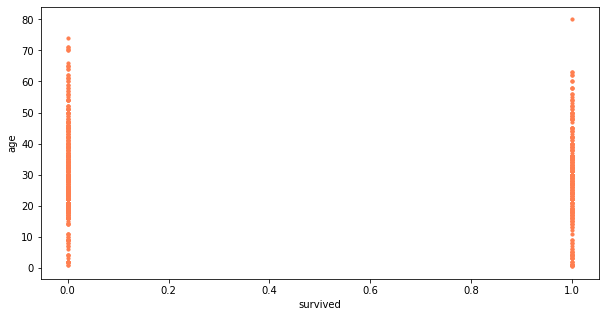

In [22]:
import matplotlib.pyplot as plt

titanic.plot(kind='scatter', x='survived', y='age', c='coral', s=10, figsize=(10, 5))
plt.show()

In [24]:
titanic_age = titanic['age']
print(titanic_age)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

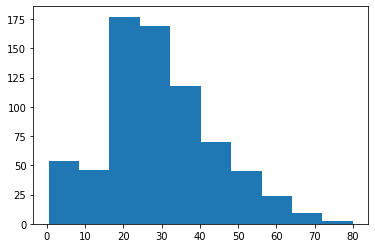

In [28]:
plt.hist(titanic_age)